<a href="https://colab.research.google.com/github/Shifana-22/Data_Science_Projects/blob/PCOS_detection/PCOS_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing and Descriptive Analysis using Python

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/PCOS_extended_dataset.csv')

# Drop 'Marraige Status (Yrs)' column
df.drop(columns=['Marraige Status (Yrs)'], inplace=True)

# Convert 'II beta-HCG(mIU/mL)' column to numeric
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')

# Check data types to confirm conversion
print(df.dtypes)



Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/

In [ ]:
# Assuming 'data' is your DataFrame
description = data.describe()

# Print the statistical summary
print(description)


            Sl. No  Patient File No.   PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  2000.000000       2000.000000  2000.000000  2000.00000  2000.000000   
mean    266.633000        266.633000     0.304000    31.35400    59.527068   
std     154.058467        154.058467     0.460098     5.44982    11.445212   
min       1.000000          1.000000     0.000000    20.00000    30.739215   
25%     132.000000        132.000000     0.000000    28.00000    52.248684   
50%     267.000000        267.000000     0.000000    31.00000    58.538632   
75%     395.000000        395.000000     1.000000    35.00000    65.519518   
max     541.000000        541.000000     1.000000    48.00000   113.379053   

       Height(Cm)           BMI  Blood Group  Pulse rate(bpm)   \
count  2000.000000  2000.000000  2000.000000       2000.000000   
mean    156.416496    24.284184    13.788000         73.241000   
std       6.044243     4.132187     1.832958          4.098941   
min     136.539081    11.939138  

In [ ]:
# Assuming 'data' is your DataFrame
column_datatypes = data.dtypes

# Print the data types of each column
print(column_datatypes)


Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [ ]:
numeric_data = data.select_dtypes(include=np.number)

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# View the correlation matrix
print(correlation_matrix)

# Set threshold for feature selection
threshold = 0.5

# Select features highly correlated with the target attribute 'PCOS (Y/N)'
target_correlation = correlation_matrix['PCOS (Y/N)'].abs().sort_values(ascending=False)
top_features = target_correlation[target_correlation > threshold].index.tolist()

# Create a correlation matrix for selected features
selected_features_data = numeric_data[top_features]
selected_features_correlation = selected_features_data.corr().abs()

# Create a mask to ignore self-correlation (diagonal elements)
mask = np.triu(np.ones_like(selected_features_correlation, dtype=bool))

# Filter out highly correlated features
uncorrelated_features = selected_features_correlation.mask(mask).stack().reset_index()
uncorrelated_features.columns = ['Feature 1', 'Feature 2', 'Correlation']
uncorrelated_features = uncorrelated_features[(uncorrelated_features['Correlation'] < threshold) & (uncorrelated_features['Correlation'] > -threshold)]

# Select final features that are not highly correlated with each other
final_features = uncorrelated_features['Feature 1'].unique().tolist()

# Now you have a list of final selected features
print(final_features)

                          Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  \
Sl. No                  1.000000          1.000000    0.065085    0.046073   
Patient File No.        1.000000          1.000000    0.065085    0.046073   
PCOS (Y/N)              0.065085          0.065085    1.000000   -0.182594   
 Age (yrs)              0.046073          0.046073   -0.182594    1.000000   
Weight (Kg)            -0.074250         -0.074250    0.221852    0.005860   
Height(Cm)             -0.007660         -0.007660    0.073486   -0.124313   
BMI                    -0.074672         -0.074672    0.204274    0.064021   
Blood Group             0.004640          0.004640    0.027818   -0.037604   
Pulse rate(bpm)        -0.045065         -0.045065    0.082620    0.064100   
RR (breaths/min)       -0.005372         -0.005372    0.059307    0.104087   
Hb(g/dl)               -0.095458         -0.095458    0.126089   -0.047007   
Cycle(R/I)             -0.032163         -0.032163    0.398291  

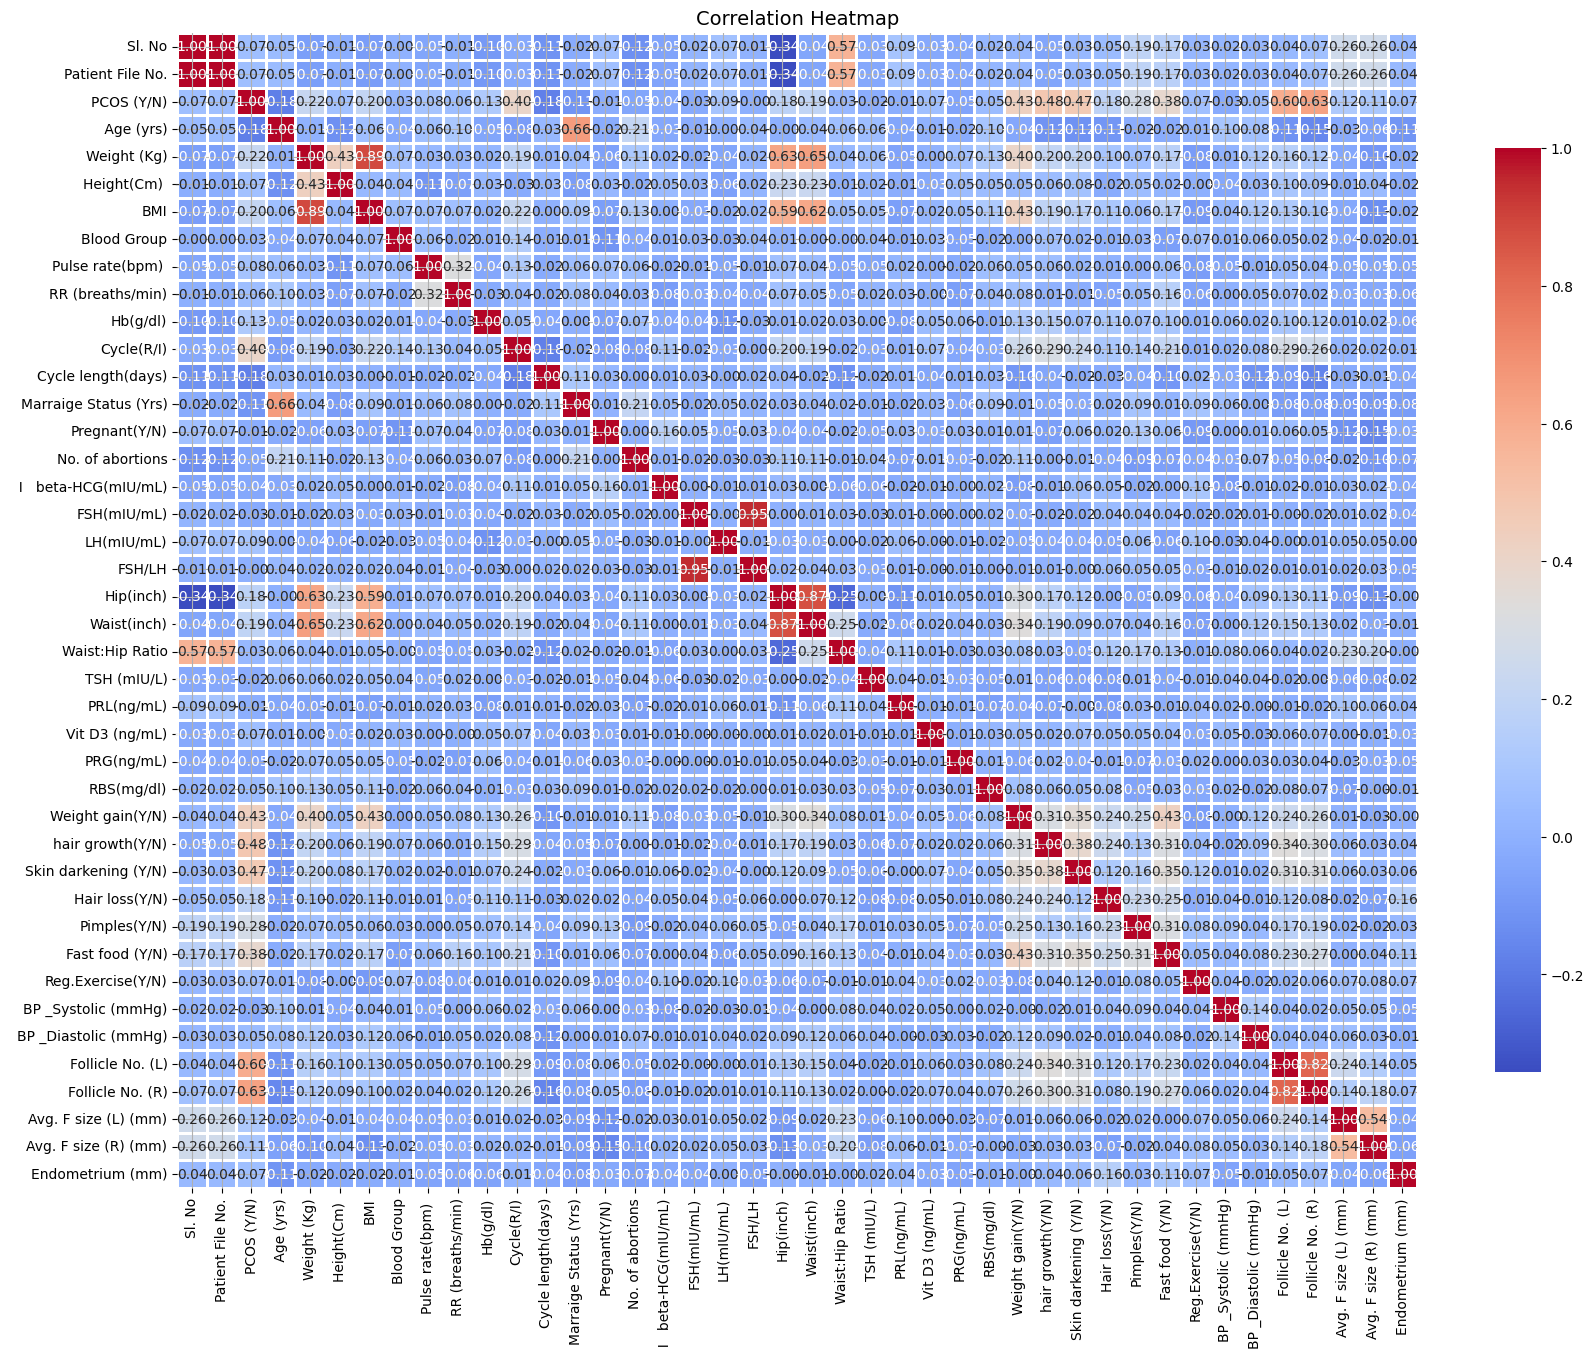

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your correlation_matrix calculated

plt.figure(figsize=(20, 15))

# Increased font size for axis labels
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0,
            xticklabels=True, yticklabels=True,  # Ensure labels are displayed
            cbar_kws={'shrink': 0.8})  # Adjust colorbar size

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)  # Uncomment if needed

plt.title('Correlation Heatmap', fontsize=14)  # Increased title font size
plt.grid(True)  # Add grid for better readability

plt.show()


In [ ]:
print(data)

      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0        193               193           0          30    69.979147   
1        360               360           0          36    63.711688   
2         10                10           0          36    51.848631   
3        278               278           1          29    66.893988   
4         71                71           0          33    52.536198   
...      ...               ...         ...         ...          ...   
1995      87                87           0          31    66.948922   
1996     508               508           0          37    64.592788   
1997     166               166           0          32    47.750129   
1998     266               266           0          40    31.869660   
1999      89                89           1          22    70.206568   

      Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0      167.708055  23.185569           12                72       

In [ ]:
print(y)

0       5.70
1       2.85
2       2.80
3       2.56
4       4.85
        ... 
1995    2.34
1996    8.06
1997    3.99
1998    5.01
1999    5.71
Name: FSH(mIU/mL), Length: 2000, dtype: float64


In [ ]:
print(X)

      AMH(ng/mL)  II    beta-HCG(mIU/mL)  Weight (Kg)  Height(Cm)         BMI  \
0           5.76                  121.80    69.979147   167.708055  23.185569   
1           3.09                  418.90    63.711688   154.055877  25.441392   
2           1.61                    1.99    51.848631   149.059804  23.928264   
3           7.30                    1.99    66.893988   148.628036  27.894935   
4           1.01                    1.99    52.536198   150.767409  23.079564   
...          ...                     ...          ...          ...        ...   
1995        3.81                    1.99    66.948922   155.976858  26.662263   
1996        0.90                    1.99    64.592788   151.979792  27.681715   
1997        2.83                    1.99    47.750129   148.596447  20.041406   
1998        8.50                    1.99    31.869660   152.589988  13.793101   
1999        3.65                    1.99    70.206568   167.852724  24.791898   

      Blood Group  Pulse ra

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


# Convert 'AMH(ng/mL)' and 'II beta-HCG(mIU/mL)' columns to numeric
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')

# Select features for analysis
feature_cols = ['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
                'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
                'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
                'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
                'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
                'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
                'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                'Endometrium (mm)']

# Split data into features(X) and target(y)
X = data[feature_cols]
y = data['FSH(mIU/mL)']

from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train Random Forest model with the imputed data
rf_model.fit(X_imputed, y)



# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display feature importances
print(feature_importance_df)


                   Feature  Importance
15                  FSH/LH    0.982953
14              LH(mIU/mL)    0.010172
5              Blood Group    0.003871
34        Follicle No. (R)    0.000852
18         Waist:Hip Ratio    0.000392
1   II    beta-HCG(mIU/mL)    0.000335
21          Vit D3 (ng/mL)    0.000253
31     BP _Systolic (mmHg)    0.000239
0               AMH(ng/mL)    0.000134
6         Pulse rate(bpm)     0.000098
19             TSH (mIU/L)    0.000073
22              PRG(ng/mL)    0.000065
24        Weight gain(Y/N)    0.000047
20              PRL(ng/mL)    0.000045
2              Weight (Kg)    0.000044
32    BP _Diastolic (mmHg)    0.000043
17             Waist(inch)    0.000038
10      Cycle length(days)    0.000035
23              RBS(mg/dl)    0.000032
3              Height(Cm)     0.000030
35    Avg. F size (L) (mm)    0.000028
4                      BMI    0.000027
8                 Hb(g/dl)    0.000027
26    Skin darkening (Y/N)    0.000025
13    I   beta-HCG(mIU/mL

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/PCOS_extended_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Preprocess the data
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')  # Convert AMH column to numeric
df.dropna(subset=['AMH(ng/mL)'], inplace=True)  # Drop rows with missing AMH values
df.dropna(subset=['PCOS (Y/N)'], inplace=True)  # Drop rows with missing PCOS labels

# Select features and target
feature_cols = ['AMH(ng/mL)', 'Weight (Kg)', 'BMI', 'Blood Group', 'RR (breaths/min)',
                'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)',
                'Pregnant(Y/N)', 'No. of abortions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
                'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
                'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
                'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
                'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
                'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
                'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
                'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']

X = df[feature_cols]  # Features
y = df['PCOS (Y/N)']  # Target

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display feature importances
print(feature_importance_df)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       131

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

                  Feature  Importance
31       Follicle No. (R)    0.184719
30       Follicle No. (L)    0.135707
21       Weight gain(Y/N)    0.055887
23   Skin darkening (Y/N)    0.050682
22       hair growth(Y/N)    0.049637
0              AMH(ng/mL)    0.045713
6      Cycle length(days)    0.031545
12                 FSH/LH    0.031178
11             LH(mIU/mL)    0.027811
26        Fast food (Y/N)    0.026986
13              Hip(inch)    0.021888
33   Avg. F size (R) (mm)    0.020900
16            TSH (mIU/L)    0.019971
18         Vit D3 (ng/mL)    0.019505
14            Waist(inch)    0.019238
5                Hb(g/dl)    0.018955
17             PRL(ng/mL)  

In [ ]:
import pandas as pd
  # Replace "your_data.csv" with the path to your dataset

# Feature engineering
# Calculate the difference between follicle numbers on the right and left ovaries
df['Follicle_No_Diff'] = df['Follicle No. (R)'] - df['Follicle No. (L)']

# Create a new binary feature representing the presence of weight gain, skin darkening, or hair growth
df['Symptoms_Present'] = df[['Weight gain(Y/N)', 'Skin darkening (Y/N)', 'hair growth(Y/N)']].max(axis=1)

# Select relevant features for training the model
selected_features = ['Follicle_No_Diff', 'Symptoms_Present']

# Add more features based on the feature importance ranking if needed

# Split the data into features (X) and target (y)
X = df[selected_features]
y = df['PCOS (Y/N)']

# Train your model using the new features
# Use the selected algorithm and hyperparameters

# Evaluate the model performance
# Use cross-validation or other validation techniques


USING SVM CLASSIFIER


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       269
           1       0.00      0.00      0.00       131

    accuracy                           0.67       400
   macro avg       0.34      0.50      0.40       400
weighted avg       0.45      0.67      0.54       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#ANN Model

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/PCOS_extended_dataset.csv")  # Replace "your_data.csv" with your dataset path

# Feature engineering
df['Follicle_No_Diff'] = df['Follicle No. (R)'] - df['Follicle No. (L)']
df['Symptoms_Present'] = df[['Weight gain(Y/N)', 'Skin darkening (Y/N)', 'hair growth(Y/N)']].max(axis=1)

# Select relevant features for training the model
selected_features = ['Follicle_No_Diff', 'Symptoms_Present']

# Split the data into features (X) and target (y)
X = df[selected_features]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

print("Accuracy:", accuracy)


Epoch 1/50
50/50 [==============================] - 2s 22ms/step - loss: 0.6486 - accuracy: 0.7100 - val_loss: 0.6181 - val_accuracy: 0.7400
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5494 - accuracy: 0.7763 - val_loss: 0.4936 - val_accuracy: 0.7900
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.7931 - val_loss: 0.4456 - val_accuracy: 0.7900
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4403 - accuracy: 0.7925 - val_loss: 0.4397 - val_accuracy: 0.7900
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 0.7919 - val_loss: 0.4362 - val_accuracy: 0.7900
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4367 - accuracy: 0.7981 - val_loss: 0.4508 - val_accuracy: 0.7850
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.7925 - val_loss: 0.4392 - val_accuracy: 0.7900
Epoch 8/50
50/50 [=

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/PCOS_extended_dataset.csv')  # Replace 'your_data.csv' with the path to your dataset

# Convert 'II beta-HCG(mIU/mL)' and 'AMH(ng/mL)' columns to numeric
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Handle missing values

# Engineer new feature: Multiply standardized values of TSH and PRL
scaler = StandardScaler()
df['TSH_scaled'] = scaler.fit_transform(df[['TSH (mIU/L)']])
df['PRL_scaled'] = scaler.fit_transform(df[['PRL(ng/mL)']])
df['TSH_PRL_interaction'] = df['TSH_scaled'] * df['PRL_scaled']

# Select features and target variable
selected_features = ['Weight (Kg)',  'BMI',
                     'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'II    beta-HCG(mIU/mL)',
                     'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
                     'RBS(mg/dl)', 'Follicle No. (L)', 'Follicle No. (R)',
                     'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
                     'TSH_PRL_interaction']

X = df[selected_features]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the architecture of the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the ANN model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
40/40 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6844 - val_loss: nan - val_accuracy: 0.7156
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 8/50
40/40 [==============================] - 0s 8ms/ste

In [ ]:
df.columns = df.columns.str.strip()

# Convert 'AMH(ng/mL)' column to float64
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
print(df.dtypes)


Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Pregnant(Y/N)               int64
No. of abortions            int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

# Drop rows with missing values

# Engineer new feature: TSH_PRL_interaction

# Select features and target variable
selected_features = ['Weight (Kg)', 'BMI' ,
                     'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
                     'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)',
                     'PRL(ng/mL)', 'TSH (mIU/L)', 'TSH_PRL_interaction']

X = df[selected_features]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the architecture of the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the ANN model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
40/40 [==============================] - 2s 11ms/step - loss: nan - accuracy: 0.6875 - val_loss: nan - val_accuracy: 0.7156
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.7031 - val_loss: nan - val_accuracy: 0.7156
Epoch 8/50
40/40 [==============================] - 0s 5ms/st

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Select features and target variable
selected_features = [ 'BMI',
                     'Cycle(R/I)', 'Cycle length(days)',
                     'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)',
                     'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
                     'hair growth(Y/N)', 'Skin darkening (Y/N)',
                     'Hair loss(Y/N)', 'Pimples(Y/N)']

X = df[selected_features]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the architecture of the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the ANN model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
40/40 [==============================] - 2s 13ms/step - loss: 0.5279 - accuracy: 0.7697 - val_loss: 0.3849 - val_accuracy: 0.8558
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3685 - accuracy: 0.8577 - val_loss: 0.3198 - val_accuracy: 0.8589
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3312 - accuracy: 0.8656 - val_loss: 0.3006 - val_accuracy: 0.8589
Epoch 4/50
40/40 [==============================] - 0s 11ms/step - loss: 0.3139 - accuracy: 0.8711 - val_loss: 0.2895 - val_accuracy: 0.8683
Epoch 5/50
40/40 [==============================] - 1s 26ms/step - loss: 0.2995 - accuracy: 0.8821 - val_loss: 0.2783 - val_accuracy: 0.8715
Epoch 6/50
40/40 [==============================] - 1s 15ms/step - loss: 0.2855 - accuracy: 0.8907 - val_loss: 0.2742 - val_accuracy: 0.8840
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.8939 - val_loss: 0.2738 - val_accuracy: 0.8871
Epoch 8/50
40/40

# Ensemble technique

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Load the dataset

# Drop rows with missing values
df.dropna(inplace=True)

# Select features and target variable
selected_features = ['BMI', 'Cycle(R/I)', 'Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)',
                     'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
                     'Hair loss(Y/N)', 'Pimples(Y/N)']

X = df[selected_features]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create ensemble of ensembles (VotingClassifier)
ensemble_models = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), ('Logistic Regression', lr_model)]
superensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the superensemble model
superensemble.fit(X_train, y_train)

# Evaluate the superensemble model
test_accuracy = superensemble.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)




Test Accuracy: 0.974937343358396


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**XG BOOSTING ON SUPERENSEMBLE MODEL**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# Load the dataset
# Data preprocessing
# Drop marriage status column

# Convert 'II beta-HCG(mIU/mL)' to numeric

# Select features and target variable
selected_features = ['BMI', 'Cycle(R/I)', 'Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)',
                     'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
                     'Hair loss(Y/N)', 'Pimples(Y/N)']

X = df[selected_features]
y = df['PCOS (Y/N)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Create ensemble of ensembles (VotingClassifier)
ensemble_models = [('Random Forest', rf_model), ('Gradient Boosting', gb_model), ('Logistic Regression', lr_model), ('XGBoost', xgb_model)]
superensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the superensemble model
superensemble.fit(X_train, y_train)

# Evaluate the superensemble model
test_accuracy = superensemble.score(X_test, y_test)
print("Test Accuracy with XGBoost:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy with XGBoost: 0.9924812030075187


# Interpreting Model results

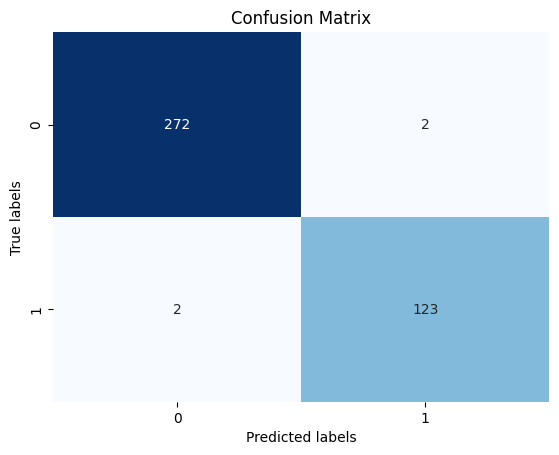

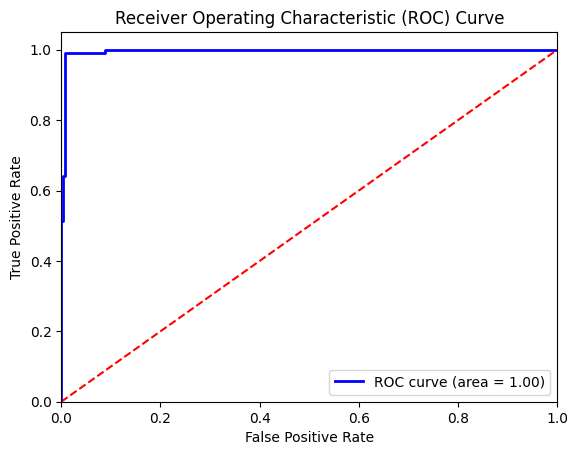

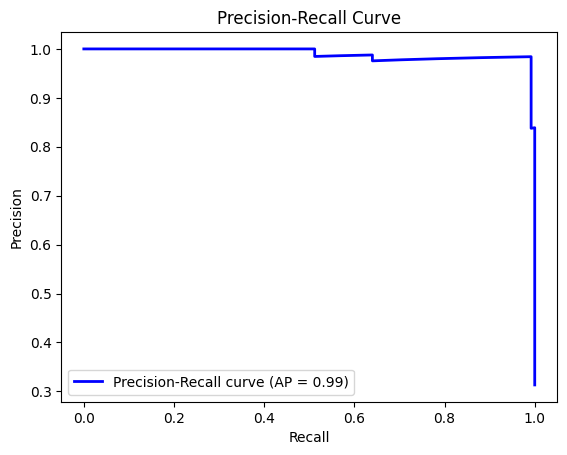

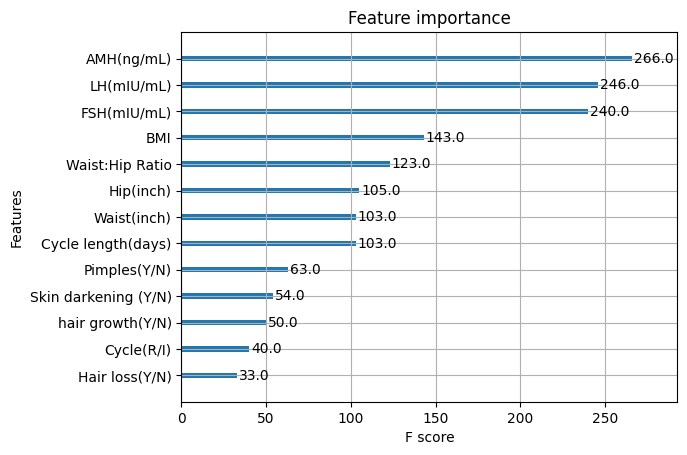

NameError: name 'ensemble_model' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
import xgboost as xgb

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Calculate and plot ROC curve
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Calculate and plot precision-recall curve
def plot_precision_recall_curve(y_true, y_pred_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    average_precision = average_precision_score(y_true, y_pred_prob)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Plot feature importance (for ensemble model)
def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

# Plot feature importance (for XGBoost model)
def plot_xgb_feature_importance(model):
    xgb.plot_importance(model)
    plt.show()

# Define XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict probabilities for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Plot Confusion Matrix for XGBoost model
plot_confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot ROC Curve for XGBoost model
plot_roc_curve(y_test, y_pred_proba_xgb)

# Plot Precision-Recall Curve for XGBoost model
plot_precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot Feature Importance for XGBoost model
plot_xgb_feature_importance(xgb_model)

# Plot Feature Importance for Ensemble model (assuming ensemble_model is the trained model)
plot_feature_importance(ensemble_model, X.columns)


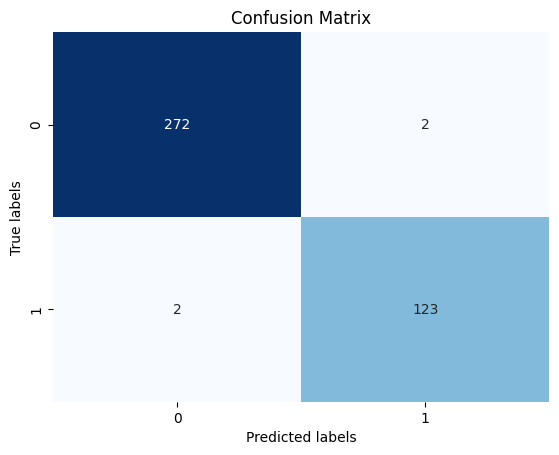

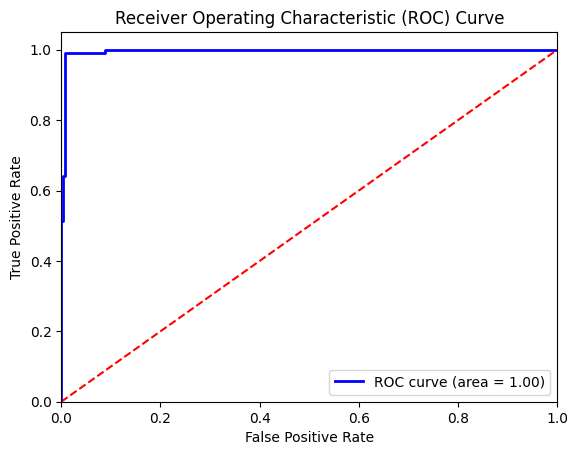

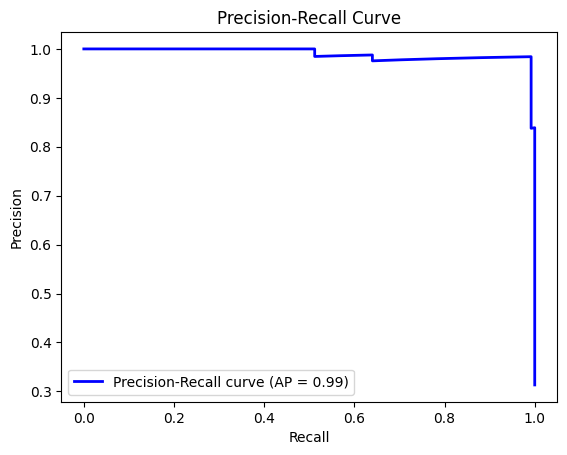

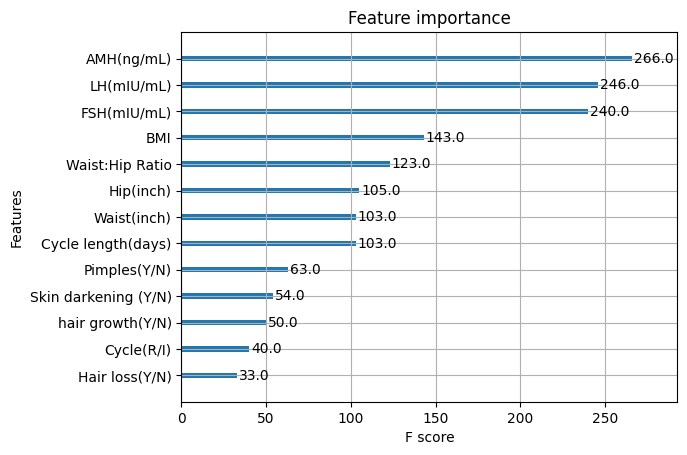

NameError: name 'ensemble_model' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
import xgboost as xgb


# Plot feature importance (for XGBoost model)
def plot_xgb_feature_importance(model):
    xgb.plot_importance(model)
    plt.show()

# Define XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict probabilities for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Plot Confusion Matrix for XGBoost model
plot_confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot ROC Curve for XGBoost model
plot_roc_curve(y_test, y_pred_proba_xgb)

# Plot Precision-Recall Curve for XGBoost model
plot_precision_recall_curve(y_test, y_pred_proba_xgb)

# Plot Feature Importance for XGBoost model
plot_xgb_feature_importance(xgb_model)

# Plot Feature Importance for Ensemble model (assuming ensemble_model is the trained model)
plot_feature_importance(ensemble_model, X.columns)

import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()
    plt.figure(figsize=(10, 8))  # Adjusted figure size
    plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()


USING R PROGRAMMING

# Pre-processing-2


In [ ]:
install.packages("readr")
library(dplyr)
library(readr)

In [ ]:
data <- read_csv("/content/PCOS_extended_dataset.csv")

Rows: 2000 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): II    beta-HCG(mIU/mL), AMH(ng/mL)
dbl (42): Sl. No, Patient File No., PCOS (Y/N), Age (yrs), Weight (Kg), Heig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
str(data)

spc_tbl_ [2,000 × 44] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sl. No                : num [1:2000] 193 360 10 278 71 473 397 315 487 88 ...
 $ Patient File No.      : num [1:2000] 193 360 10 278 71 473 397 315 487 88 ...
 $ PCOS (Y/N)            : num [1:2000] 0 0 0 1 0 1 0 1 1 0 ...
 $ Age (yrs)             : num [1:2000] 30 36 36 29 33 26 31 34 30 40 ...
 $ Weight (Kg)           : num [1:2000] 70 63.7 51.8 66.9 52.5 ...
 $ Height(Cm)            : num [1:2000] 168 154 149 149 151 ...
 $ BMI                   : num [1:2000] 23.2 25.4 23.9 27.9 23.1 ...
 $ Blood Group           : num [1:2000] 12 13 15 15 13 11 15 11 11 11 ...
 $ Pulse rate(bpm)       : num [1:2000] 72 70 80 72 72 72 72 78 74 80 ...
 $ RR (breaths/min)      : num [1:2000] 22 18 20 18 18 18 18 20 18 20 ...
 $ Hb(g/dl)              : num [1:2000] 12 10.5 10 12 10.2 12 12.8 11 11.7 10.3 ...
 $ Cycle(R/I)            : num [1:2000] 4 2 4 4 2 2 2 2 4 2 ...
 $ Cycle length(days)    : num [1:2000] 5 6 2 5 5 5 6 6 2 5 ...
 $ M

In [ ]:
print(data.dtypes)

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

                          Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  \
Sl. No                  1.000000          1.000000    0.065085    0.046073   
Patient File No.        1.000000          1.000000    0.065085    0.046073   
PCOS (Y/N)              0.065085          0.065085    1.000000   -0.182594   
 Age (yrs)              0.046073          0.046073   -0.182594    1.000000   
Weight (Kg)            -0.074250         -0.074250    0.221852    0.005860   
Height(Cm)             -0.007660         -0.007660    0.073486   -0.124313   
BMI                    -0.074672         -0.074672    0.204274    0.064021   
Blood Group             0.004640          0.004640    0.027818   -0.037604   
Pulse rate(bpm)        -0.045065         -0.045065    0.082620    0.064100   
RR (breaths/min)       -0.005372         -0.005372    0.059307    0.104087   
Hb(g/dl)               -0.095458         -0.095458    0.126089   -0.047007   
Cycle(R/I)             -0.032163         -0.032163    0.398291  

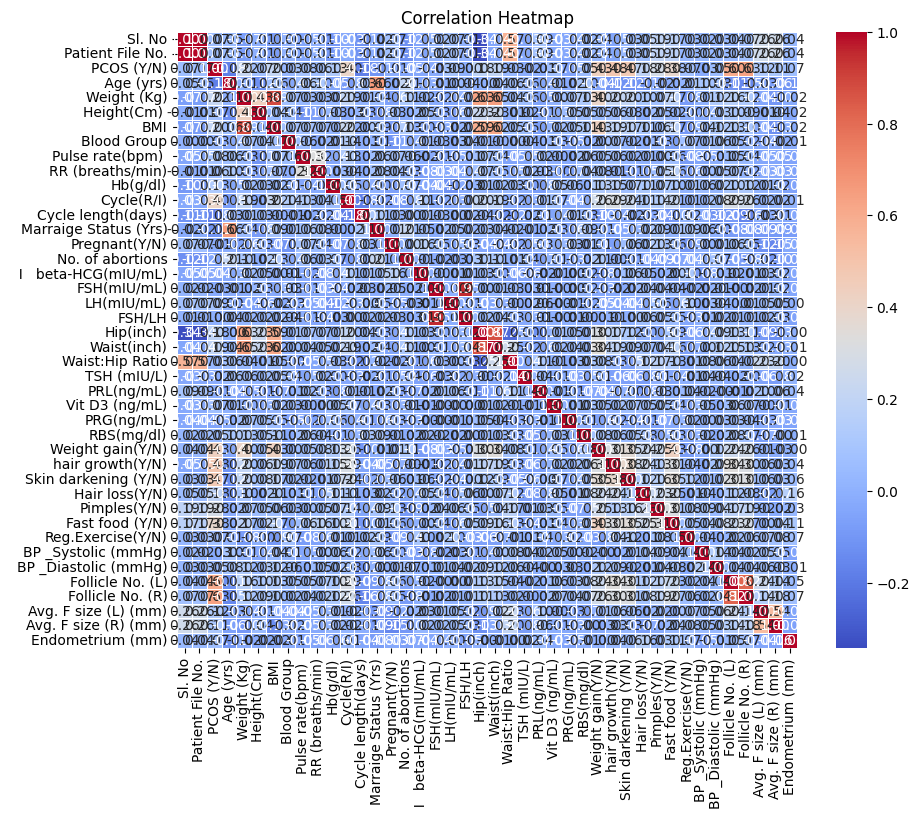

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('/content/PCOS_extended_dataset.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# View the correlation matrix
print(correlation_matrix)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**FACTORS TO BE CONSIDERED**

PCOS (Y/N)

Age (yrs)

Weight (Kg)

Height(Cm)

BMI

Cycle(R/I)

Cycle length(days)

Hormonal markers (e.g., FSH, LH, AMH)

Physical characteristics (e.g., hip circumference, waist circumference, waist-to-hip ratio)

Symptoms (e.g., hair growth, skin darkening, hair loss, pimples)


# Descriptive Analysis

# BOX-PLOT FOR OUTLIER ANALYSIS

In [ ]:
install.packages("tidyverse")
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


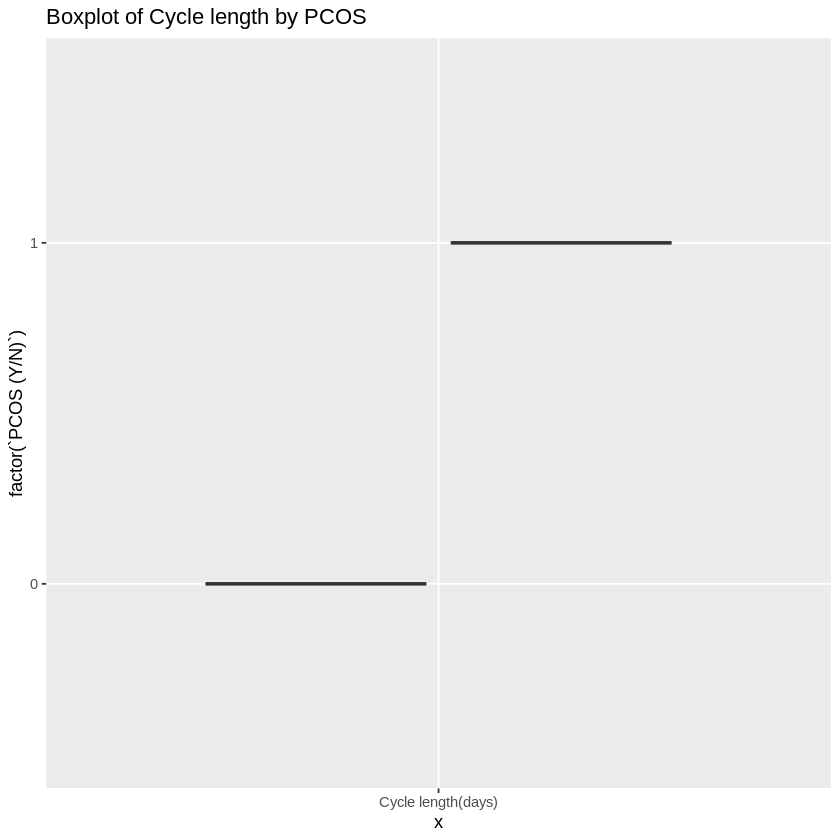

In [ ]:
ggplot(data, aes(x =  'Cycle length(days)' , y = factor(`PCOS (Y/N)`))) +
  geom_boxplot() +
  labs(title = "Boxplot of Cycle length by PCOS")


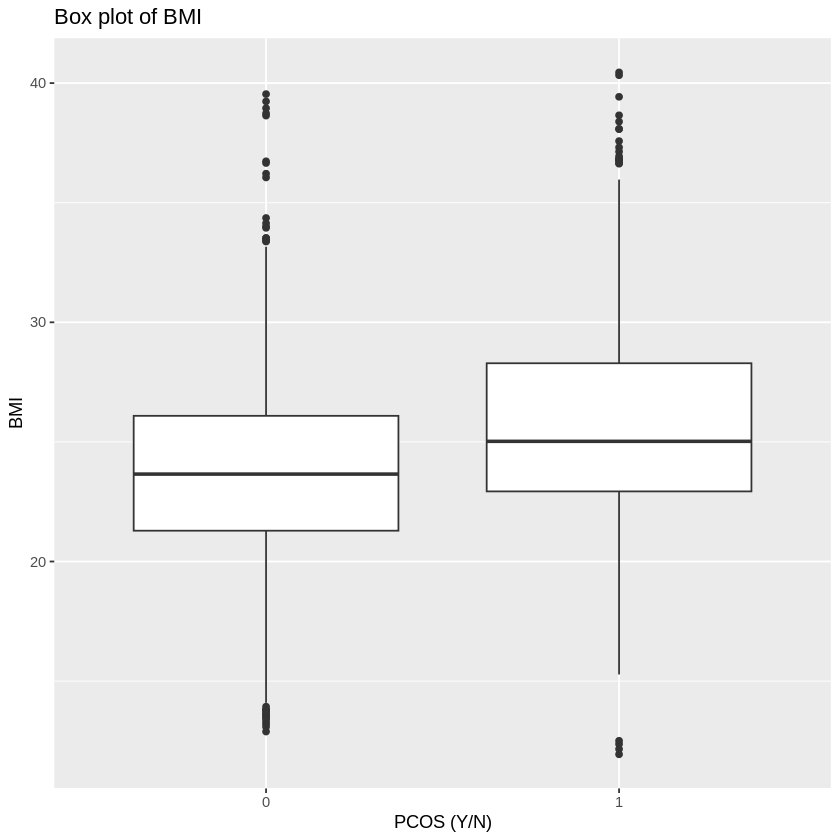

In [ ]:
ggplot(data, aes(x = factor(`PCOS (Y/N)`), y = BMI)) +
  geom_boxplot() +
  labs(x = "PCOS (Y/N)", y = "BMI") +
  ggtitle("Box plot of BMI")


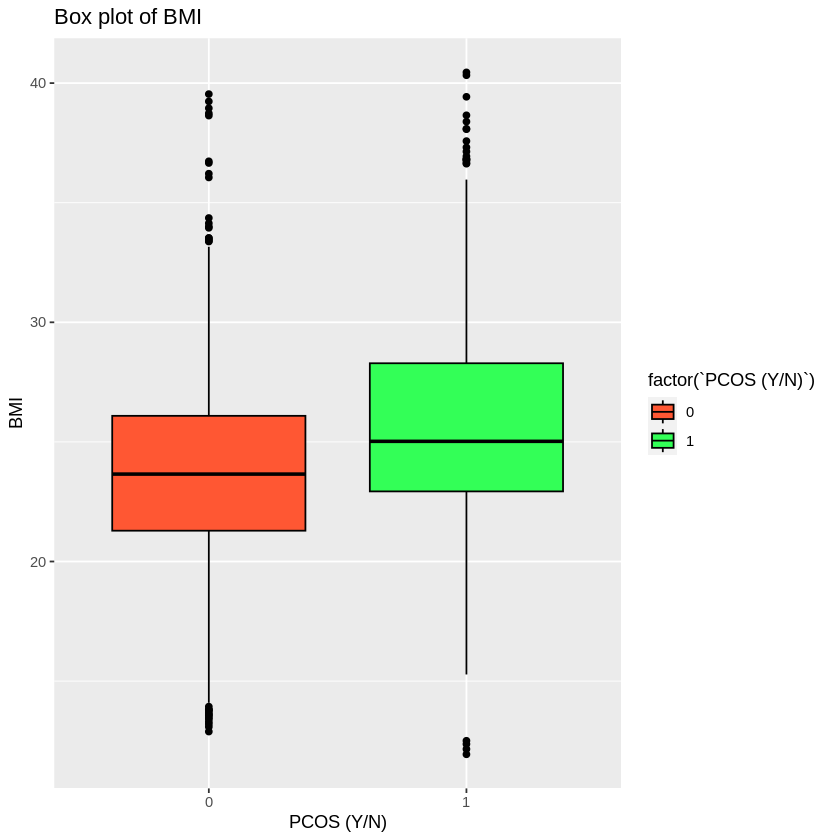

In [ ]:
library(ggplot2)

# Define vibrant colors
vibrant_colors <- c("#FF5733", "#33FF57")

# Plot boxplot
ggplot(data, aes(x = factor(`PCOS (Y/N)`), y = BMI, fill = factor(`PCOS (Y/N)`))) +
  geom_boxplot(color = "black") +
  scale_fill_manual(values = vibrant_colors) +  # Apply vibrant colors
  labs(x = "PCOS (Y/N)", y = "BMI") +
  ggtitle("Box plot of BMI")


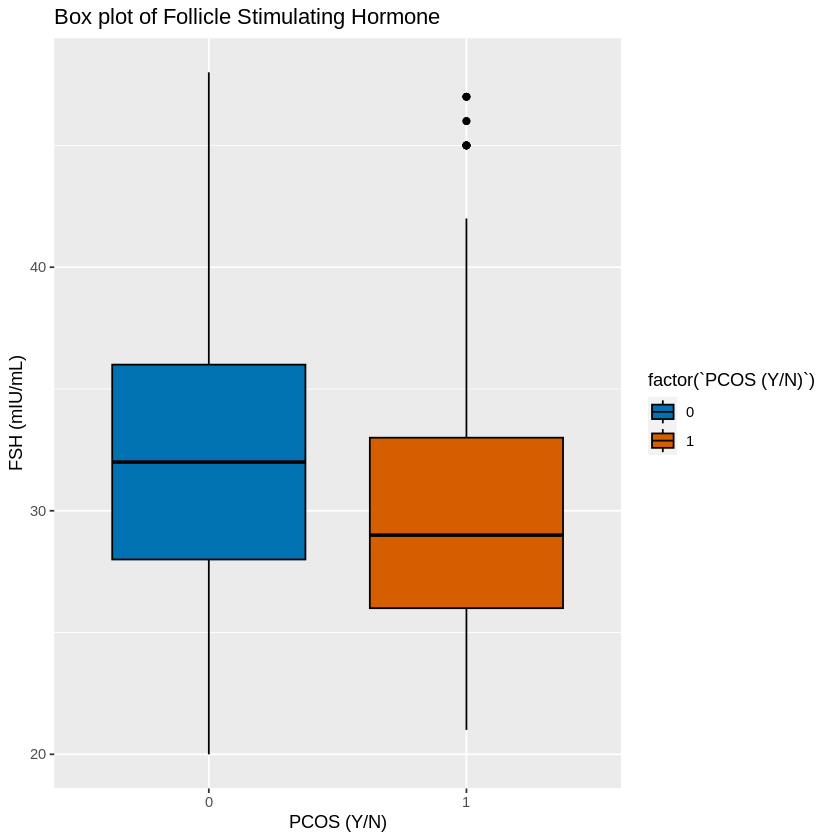

In [ ]:
cool_colors <- c("#0072B2", "#D55E00")

# Plot boxplot
ggplot(data, aes(x = factor(`PCOS (Y/N)`), y = `Age (yrs)`, fill = factor(`PCOS (Y/N)`))) +
  geom_boxplot(color = "black") +
  scale_fill_manual(values = cool_colors) +  # Apply cool colors
  labs(x = "PCOS (Y/N)", y = "FSH (mIU/mL)") +
  ggtitle("Box plot of Follicle Stimulating Hormone")

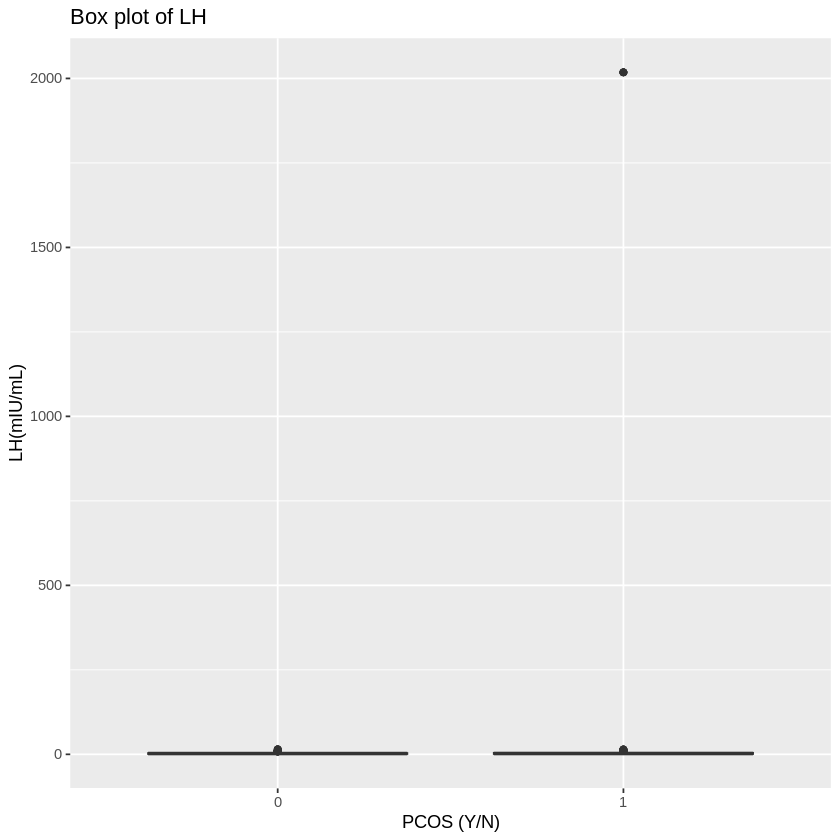

In [ ]:
# Box plot for LH
ggplot(data, aes(x = factor(`PCOS (Y/N)`), y = `LH(mIU/mL)`)) +
  geom_boxplot() +
  labs(x = "PCOS (Y/N)", y = "LH(mIU/mL)") +
  ggtitle("Box plot of LH")


In [ ]:
install.packages("reshape2")
library(reshape2)
melted_data <- melt(data, id.vars = "PCOS (Y/N)")

# Create box plots for three variables grouped by PCOS status
ggplot(melted_data, aes(x = variable, y = value)) +
  geom_boxplot() +
  facet_wrap(~`PCOS (Y/N)`, scales = "free") +
  labs(x = "Variable", y = "Value") +
  ggtitle("Box plots of Age, Weight, and Height by PCOS status")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




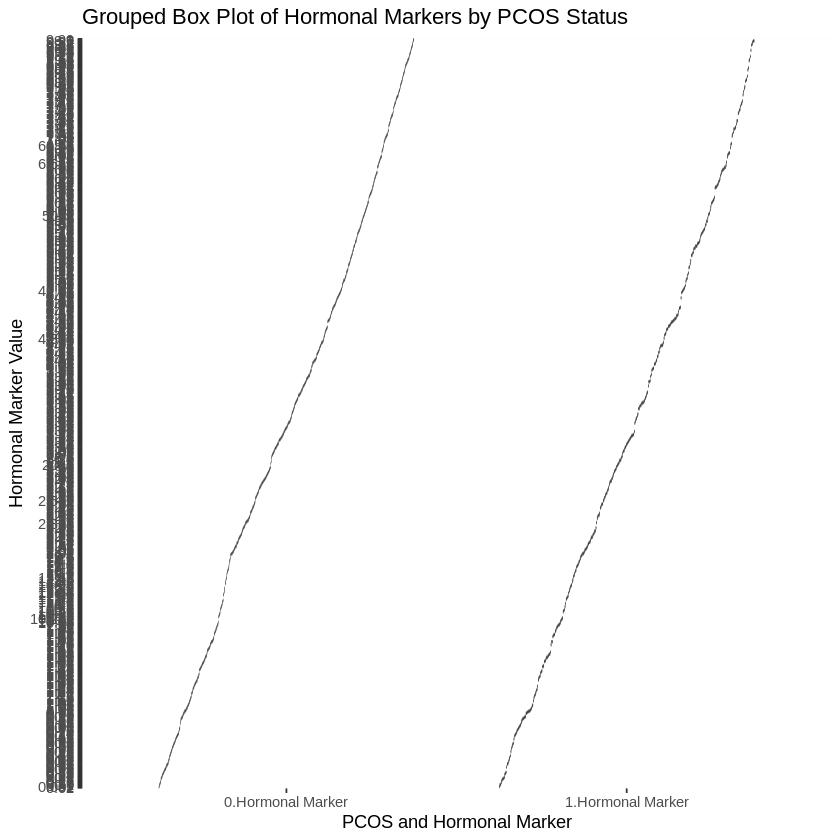

In [ ]:
# Load required libraries
library(ggplot2)


# Create a new factor variable combining PCOS status and hormonal marker
data$PCOS_Hormonal <- interaction(data$`PCOS (Y/N)`, "Hormonal Marker")

# Melt the data to long format for easier plotting
library(reshape2)
melted_data <- melt(data, id.vars = "PCOS_Hormonal", measure.vars = c("FSH(mIU/mL)", "LH(mIU/mL)", "AMH(ng/mL)"))

# Create a box plot for hormonal markers grouped by PCOS status
ggplot(melted_data, aes(x = PCOS_Hormonal, y = value, fill = variable)) +
  geom_boxplot() +
  labs(x = "PCOS and Hormonal Marker", y = "Hormonal Marker Value") +
  ggtitle("Grouped Box Plot of Hormonal Markers by PCOS Status") +
  scale_fill_manual(values = c("FSH" = "red", "LH" = "blue", "AMH" = "green")) +
  theme(legend.title = element_blank())


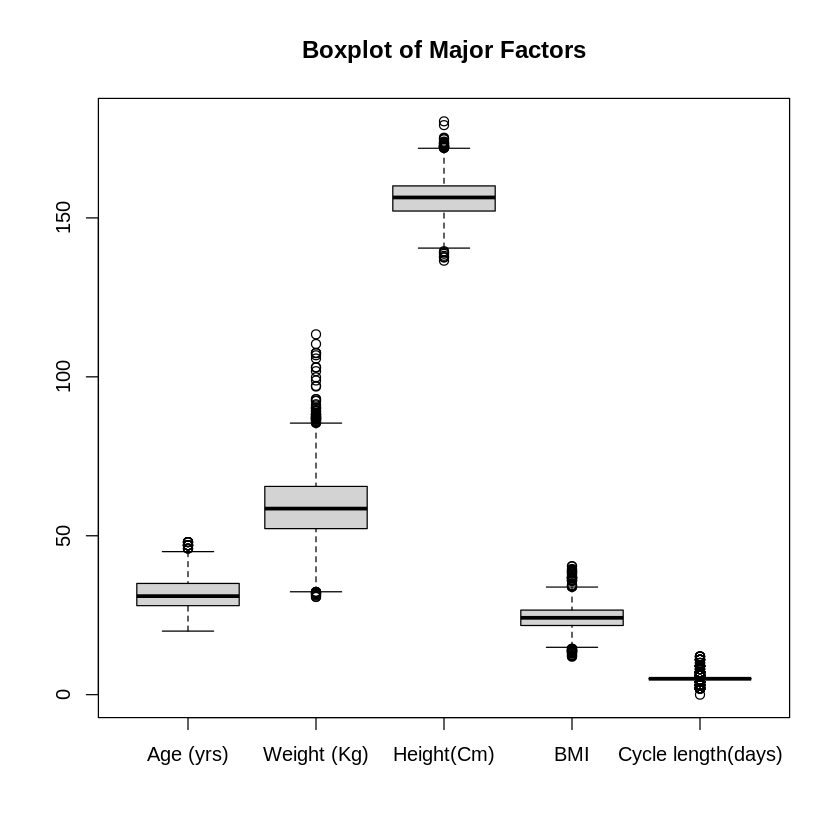

In [ ]:
# Load required libraries
library(ggplot2)

# Create box plots for major factors
boxplot_data <- data[, c("Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Cycle length(days)")]
boxplot(boxplot_data, main = "Boxplot of Major Factors")

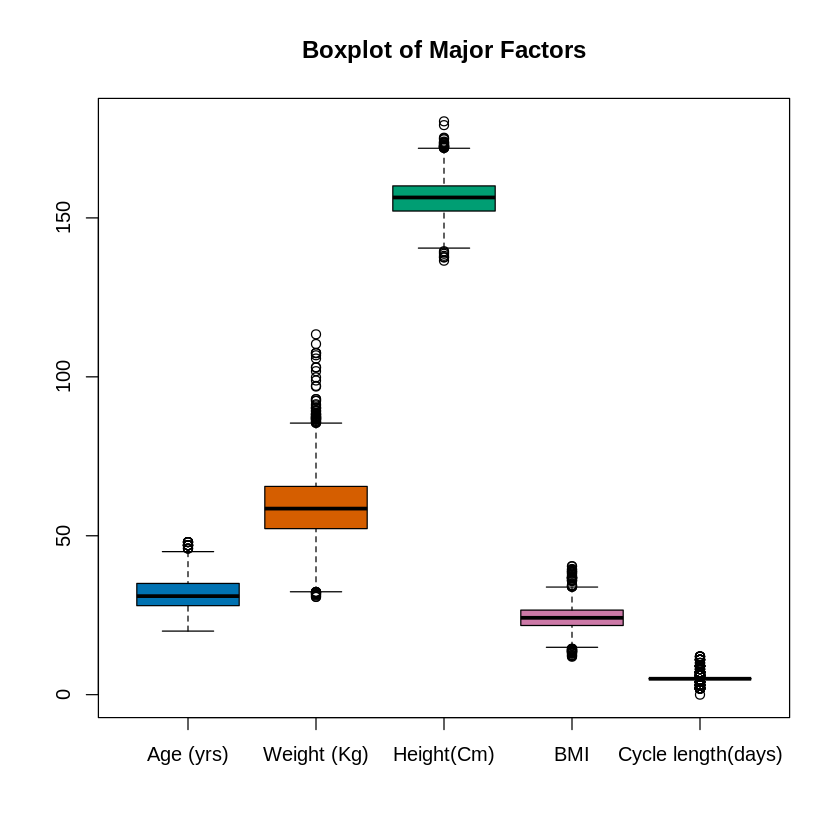

In [ ]:
# Define cool colors for the box plots
boxplot_colors <- c("Age (yrs)" = "#0072B2",
                    "Weight (Kg)" = "#D55E00",
                    "Height(Cm)" = "#009E73",
                    "BMI" = "#CC79A7",
                    "Cycle length(days)" = "#F0E442")

# Create box plots for major factors with cool colors
boxplot_data <- data[, c("Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Cycle length(days)")]
boxplot(boxplot_data, col = boxplot_colors, main = "Boxplot of Major Factors")


In [ ]:
#Handling outliers using IQR method
# Calculate the IQR for each numerical variable
Q1 <- quantile(data$SepalLengthCm, 0.25)
Q3 <- quantile(data$SepalLengthCm, 0.75)
IQR <- Q3 - Q1

ERROR: Error in eval(expr, envir, enclos): object 'cleaned_data' not found


In [ ]:
 #Define the upper and lower bounds
upper_bound <- Q3 + 1.5 * IQR
lower_bound <- Q1 - 1.5 * IQR


In [ ]:
# Identify outliers
outliers <- cleaned_data$SepalLengthCm < lower_bound | cleaned_data$SepalLengthCm > upper_bound

# CORRELATION PLOT


In [ ]:
install.packages("readr")
install.packages("dplyr")


library(readr)
library(dplyr)


# Read the dataset
data <- read.csv('/PCOS_extended_dataset.csv')

# Filter numeric data
numeric_data <- data[, sapply(data, is.numeric)]

results <- sapply(numeric_data, function(x) {
  if(length(unique(data$`PCOS (Y/N)`)) == 2) {
    # If 'PCOS (Y/N)' has only two levels, perform a t-test
    t_test_result <- t.test(x ~ data$`PCOS (Y/N)`)
    p_value <- t_test_result$p.value
  } else {
    # Otherwise, perform an ANOVA
    result <- aov(x ~ data$`PCOS (Y/N)`)
    p_value <- summary(result)[[1]][["Pr(>F)"]][[1]]
  }
  return(p_value)
})

# Select top 10 features with lowest p-values
selected_features <- names(sort(results, decreasing = FALSE)[1:10])
print(selected_features)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in model.frame.default(formula = x ~ data$`PCOS (Y/N)`, drop.unused.levels = TRUE): invalid type (NULL) for variable 'data$`PCOS (Y/N)`'


In [ ]:
# Read the dataset
data <- read.csv('/PCOS_extended_dataset.csv')  # Adjust the path as needed



In [ ]:
# Filter numeric data
numeric_data <- data[, sapply(data, is.numeric)]

results <- sapply(numeric_data, function(x) {
  if (length(unique(data$`PCOS..Y.N.`)) == 2) {
    # If 'PCOS..Y.N.' has only two levels, perform a t-test
    t_test_result <- t.test(x ~ data$`PCOS..Y.N.`)
    p_value <- t_test_result$p.value
  } else {
    # Otherwise, perform an ANOVA
    result <- aov(x ~ data$`PCOS..Y.N.`)
    p_value <- summary(result)[[1]][["Pr(>F)"]][[1]]
  }
  return(p_value)
})

# Select top 10 features with lowest p-values
selected_features <- names(sort(results, decreasing = FALSE)[1:10])
print(selected_features)


ERROR: Error in t.test.default(x = DATA[[1L]], y = DATA[[2L]], ...): data are essentially constant


In [ ]:
constant_columns <- sapply(data, function(x) length(unique(x)) == 1)
constant_column_names <- names(constant_columns)[constant_columns]
print(constant_column_names)


character(0)


In [ ]:
data <- data[, !constant_columns]


In [ ]:
# Filter numeric data
numeric_data <- data[, sapply(data, is.numeric)]


In [ ]:
# List all column names to verify 'PCOS (Y/N)' column name
print(colnames(data))

# Inspect the structure of the dataset to verify column names and contents
str(data)

 [1] "Sl..No"                 "Patient.File.No."       "PCOS..Y.N."            
 [4] "Age..yrs."              "Weight..Kg."            "Height.Cm."            
 [7] "BMI"                    "Blood.Group"            "Pulse.rate.bpm."       
[10] "RR..breaths.min."       "Hb.g.dl."               "Cycle.R.I."            
[13] "Cycle.length.days."     "Marraige.Status..Yrs."  "Pregnant.Y.N."         
[16] "No..of.abortions"       "I...beta.HCG.mIU.mL."   "II....beta.HCG.mIU.mL."
[19] "FSH.mIU.mL."            "LH.mIU.mL."             "FSH.LH"                
[22] "Hip.inch."              "Waist.inch."            "Waist.Hip.Ratio"       
[25] "TSH..mIU.L."            "AMH.ng.mL."             "PRL.ng.mL."            
[28] "Vit.D3..ng.mL."         "PRG.ng.mL."             "RBS.mg.dl."            
[31] "Weight.gain.Y.N."       "hair.growth.Y.N."       "Skin.darkening..Y.N."  
[34] "Hair.loss.Y.N."         "Pimples.Y.N."           "Fast.food..Y.N."       
[37] "Reg.Exercise.Y.N."      "BP._Systo

In [ ]:
# Select only numeric columns
numeric_data <- data[, sapply(data, is.numeric)]

# Compute correlation matrix
correlation_matrix <- cor(numeric_data)

# View the correlation matrix
print(correlation_matrix)


                            Sl..No Patient.File.No.   PCOS..Y.N.    Age..yrs.
Sl..No                 1.000000000      1.000000000  0.065085335  0.046072749
Patient.File.No.       1.000000000      1.000000000  0.065085335  0.046072749
PCOS..Y.N.             0.065085335      0.065085335  1.000000000 -0.182593898
Age..yrs.              0.046072749      0.046072749 -0.182593898  1.000000000
Weight..Kg.           -0.074249780     -0.074249780  0.221851826  0.005860080
Height.Cm.            -0.007659880     -0.007659880  0.073485593 -0.124312910
BMI                   -0.074672401     -0.074672401  0.204273929  0.064020575
Blood.Group            0.004640337      0.004640337  0.027817649 -0.037604249
Pulse.rate.bpm.       -0.045065457     -0.045065457  0.082619870  0.064100210
RR..breaths.min.      -0.005372192     -0.005372192  0.059306946  0.104087060
Hb.g.dl.              -0.095457696     -0.095457696  0.126088507 -0.047006668
Cycle.R.I.            -0.032163009     -0.032163009  0.398291127

In [ ]:
install.packages("corrplot")
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"width" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"width" is not a graphical parameter”
Warning message in title(title, ...):
“"width" is not a graphical parameter”


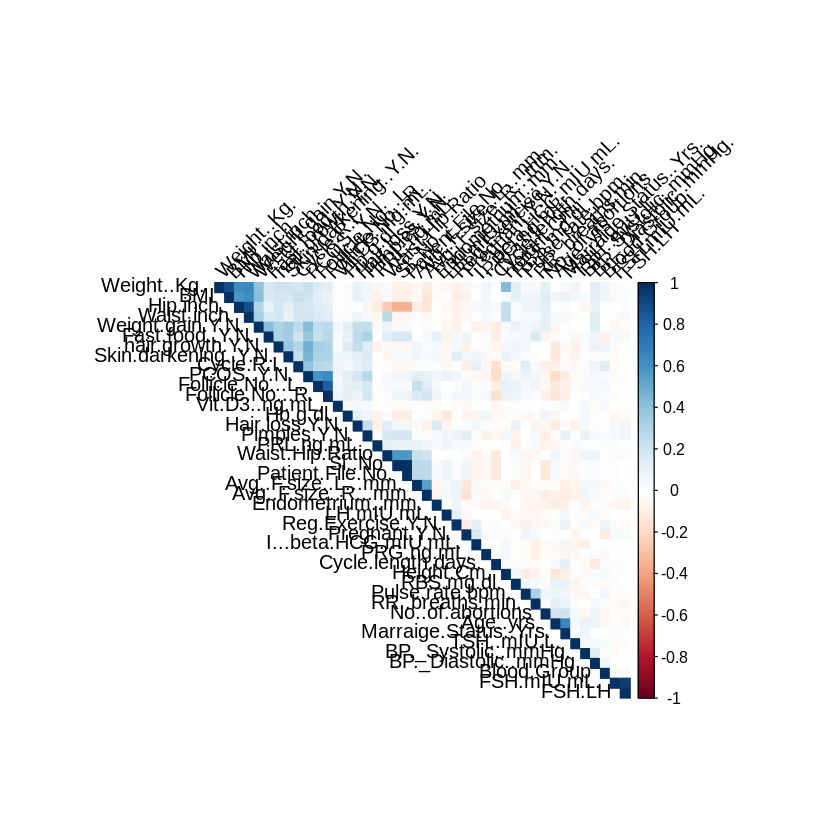

In [ ]:
# Impute missing values with the mean for each column
imputed_data <- apply(numeric_data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))

# Compute correlation matrix for the imputed data
correlation_matrix_imputed <- cor(imputed_data)

# Create correlation plot
corrplot(correlation_matrix_imputed, method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45,width =10)


In [ ]:
# Compute correlation matrix
correlation_matrix <- cor(numeric_data)

# Create correlation plot
corrplot(correlation_matrix, method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)


ERROR: Error in hclust(as.dist(1 - corr), method = hclust.method): NA/NaN/Inf in foreign function call (arg 10)


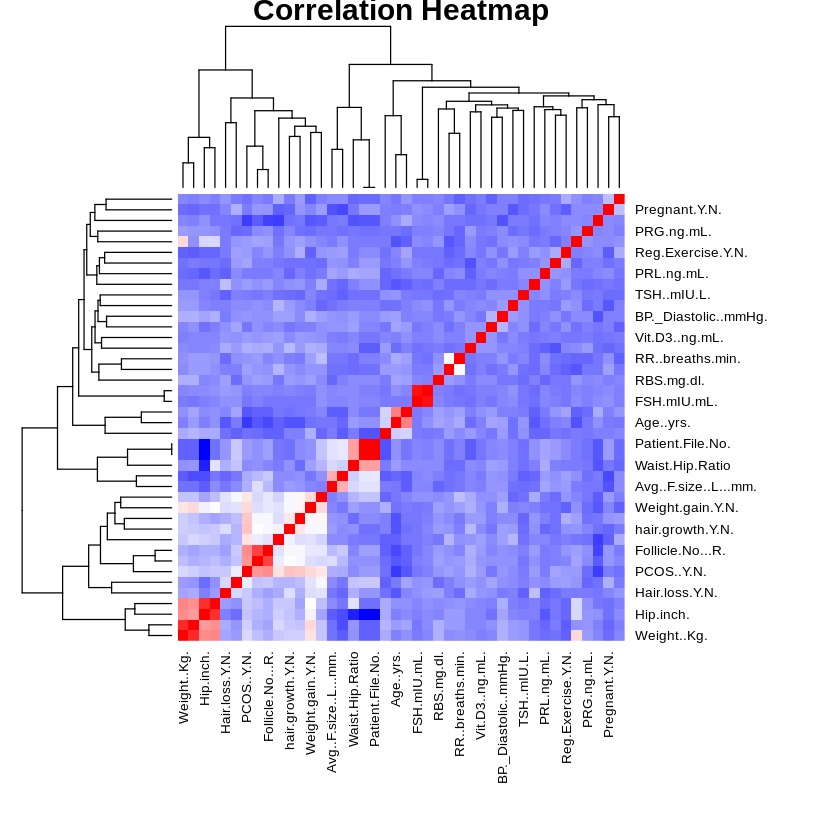

In [ ]:
# Compute correlation matrix for the imputed data
correlation_matrix_imputed <- cor(imputed_data)

# Hierarchical clustering
hc_rows <- hclust(dist(correlation_matrix_imputed))
hc_cols <- hclust(dist(t(correlation_matrix_imputed)))

# Create heatmap
heatmap(correlation_matrix_imputed,
        Rowv = as.dendrogram(hc_rows),
        Colv = as.dendrogram(hc_cols),
        col = colorRampPalette(c("blue", "white", "red"))(100),
        scale = "none",
        margins = c(10, 10),
        main = "Correlation Heatmap")


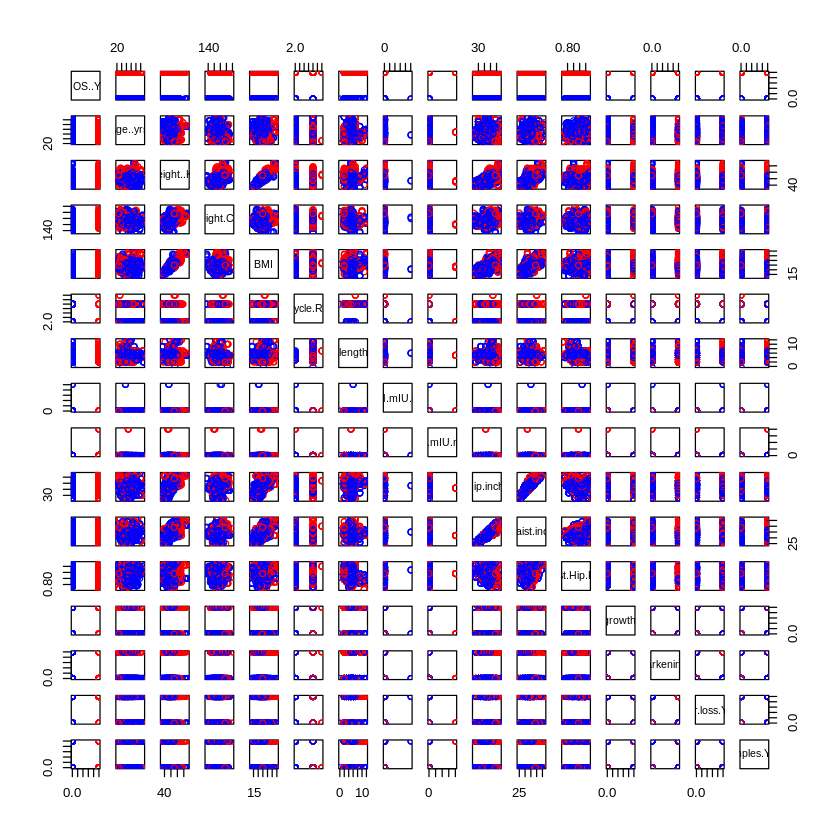

In [ ]:
# Define colors based on PCOS (Y/N)
colors <- ifelse(numeric_data$PCOS..Y.N. == 1, "red", "blue")

# Select subset of variables for the pairplot
subset_data <- numeric_data[, c("PCOS..Y.N.", "Age..yrs.", "Weight..Kg.", "Height.Cm.", "BMI", "Cycle.R.I.", "Cycle.length.days.",
                                "FSH.mIU.mL.", "LH.mIU.mL.", "Hip.inch.", "Waist.inch.", "Waist.Hip.Ratio",
                                "hair.growth.Y.N.", "Skin.darkening..Y.N.", "Hair.loss.Y.N.", "Pimples.Y.N.")]

# Create pairplot with color
pairs(subset_data, col = colors)


In [ ]:
# Check the column names of numeric_data
colnames(numeric_data)

# Make sure selected_features contain correct column names
selected_features <- intersect(selected_features, colnames(numeric_data))

# Select only the columns that exist in numeric_data
selected_data <- numeric_data[, selected_features]

# Print the dimensions of the selected data
print(dim(selected_data))

# Print the names of the selected features
print(colnames(selected_data))


[1] "Sl..No"                "Patient.File.No."      "PCOS..Y.N."           
 [4] "Age..yrs."             "Weight..Kg."           "Height.Cm."           
 [7] "BMI"                   "Blood.Group"           "Pulse.rate.bpm."      
[10] "RR..breaths.min."      "Hb.g.dl."              "Cycle.R.I."           
[13] "Cycle.length.days."    "Marraige.Status..Yrs." "Pregnant.Y.N."        
[16] "No..of.abortions"      "I...beta.HCG.mIU.mL."  "FSH.mIU.mL."          
[19] "LH.mIU.mL."            "FSH.LH"                "Hip.inch."            
[22] "Waist.inch."           "Waist.Hip.Ratio"       "TSH..mIU.L."          
[25] "PRL.ng.mL."            "Vit.D3..ng.mL."        "PRG.ng.mL."           
[28] "RBS.mg.dl."            "Weight.gain.Y.N."      "hair.growth.Y.N."     
[31] "Skin.darkening..Y.N."  "Hair.loss.Y.N."        "Pimples.Y.N."         
[34] "Fast.food..Y.N."       "Reg.Exercise.Y.N."     "BP._Systolic..mmHg."  
[37] "BP._Diastolic..mmHg."  "Follicle.No...L."      "Follicle.No...R."     
[40] "Avg..F.size..L...mm."  "Avg..F.size..R...mm."  "Endometrium..mm."

[1] 2000    9
[1] "FSH.mIU.mL."      "RBS.mg.dl."       "TSH..mIU.L."      "PRL.ng.mL."      
[5] "Weight..Kg."      "Hip.inch."        "Waist.Hip.Ratio"  "Follicle.No...L."
[9] "Follicle.No...R."


In [ ]:
# Print the names of the selected features
print(colnames(selected_data))

[1] "FSH.mIU.mL."      "RBS.mg.dl."       "TSH..mIU.L."      "PRL.ng.mL."      
[5] "Weight..Kg."      "Hip.inch."        "Waist.Hip.Ratio"  "Follicle.No...L."
[9] "Follicle.No...R."


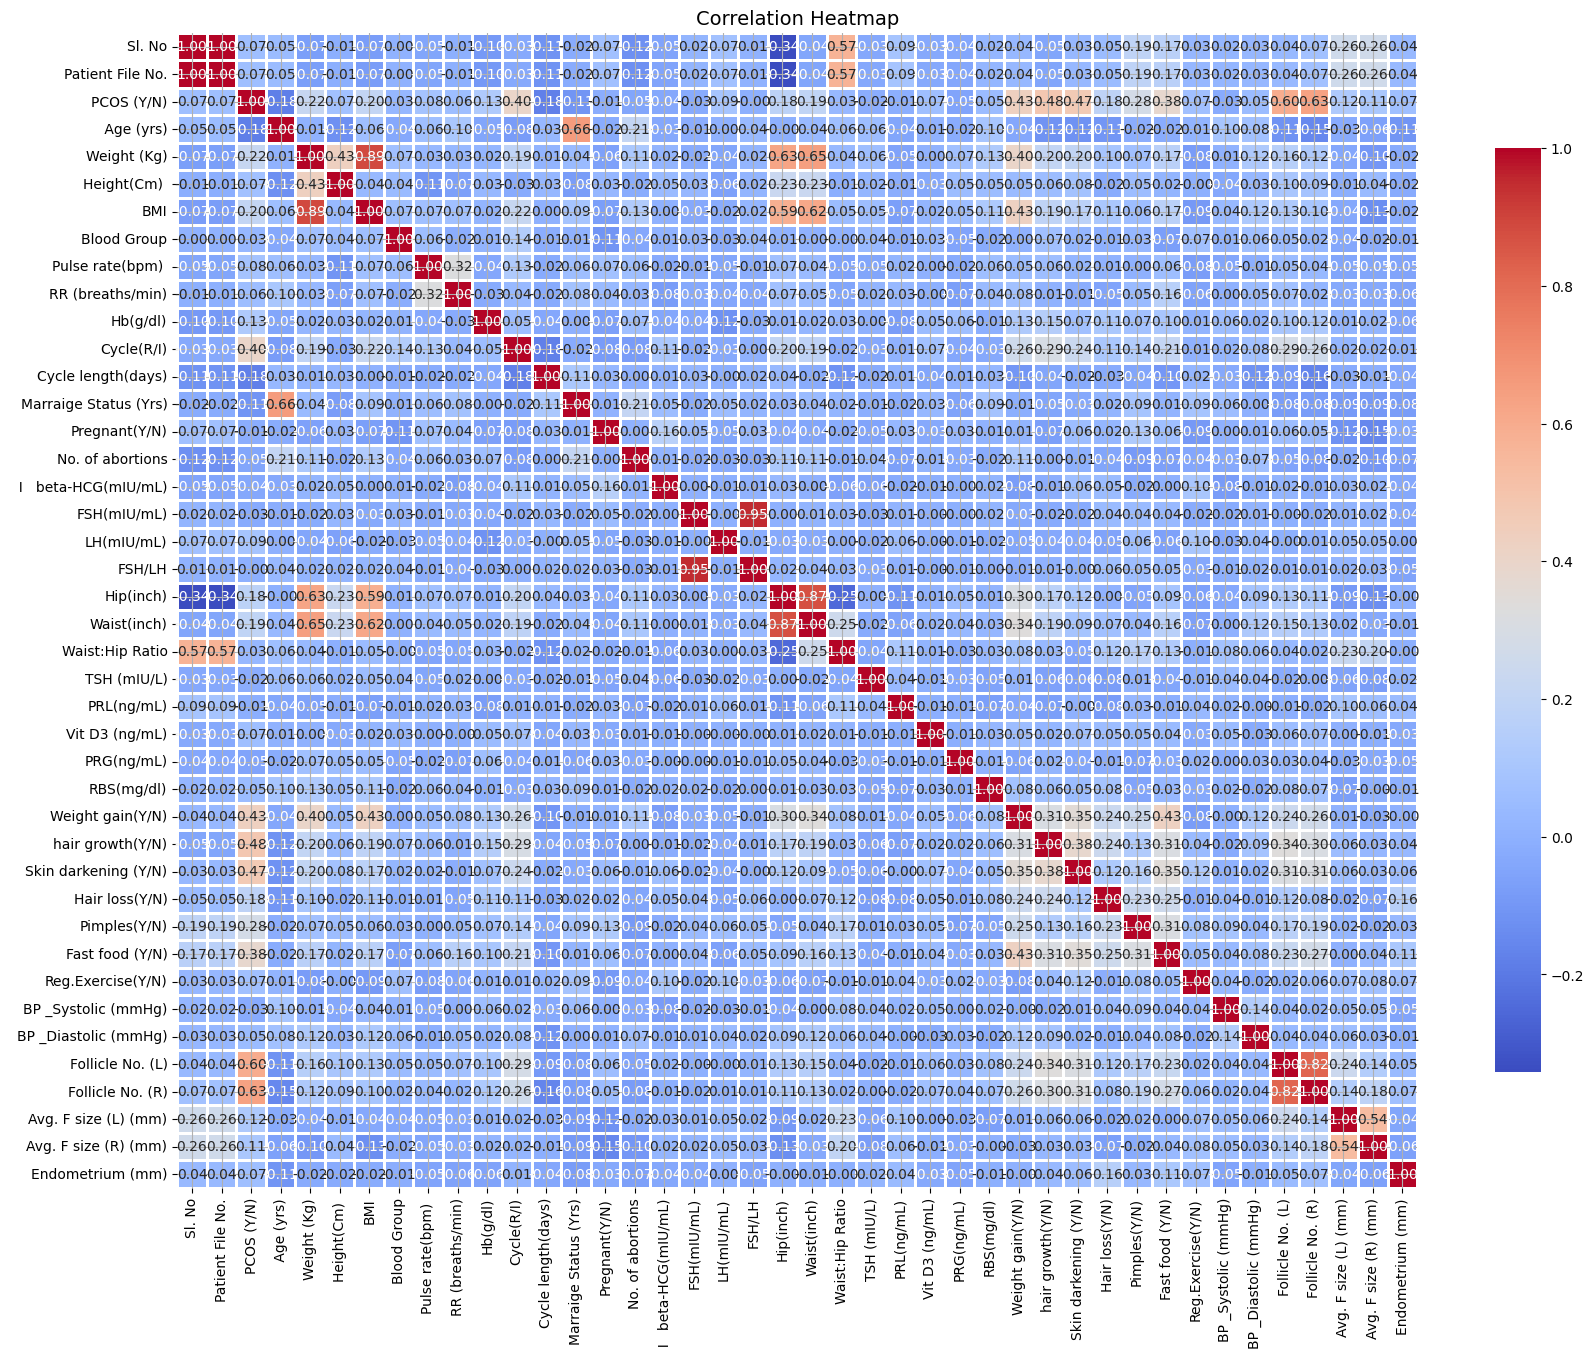

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your correlation_matrix calculated

plt.figure(figsize=(20, 15))

# Increased font size for axis labels
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0,
            xticklabels=True, yticklabels=True,  # Ensure labels are displayed
            cbar_kws={'shrink': 0.8})  # Adjust colorbar size

# Rotate x-axis labels for better readability (optional)
# plt.xticks(rotation=45)  # Uncomment if needed

plt.title('Correlation Heatmap', fontsize=14)  # Increased title font size
plt.grid(True)  # Add grid for better readability

plt.show()


In [ ]:
# Select numeric columns
numeric_data <- data[, sapply(data, is.numeric)]

# Perform statistical tests for feature selection
results <- sapply(numeric_data, function(x) {
  if (length(unique(data$PCOS..Y.N.)) == 2 && length(unique(x)) > 1) {
    t_test_result <- t.test(x ~ data$PCOS..Y.N.)
    p_value <- t_test_result$p.value
  } else {
    result <- aov(x ~ data$PCOS..Y.N.)
    p_value <- summary(result)[[1]][["Pr(>F)"]][[1]]
  }
  return(p_value)
})

# Select top 10 features with lowest p-values
selected_features <- names(sort(results, decreasing = FALSE)[1:10])

# Make sure selected_features contain correct column names
selected_features <- intersect(selected_features, colnames(numeric_data))

# Select only the columns that exist in numeric_data
selected_data <- numeric_data[, selected_features]

# Print the dimensions of the selected data
print(dim(selected_data))

# Print the names of the selected features
print(colnames(selected_data))


ERROR: Error in t.test.default(x = DATA[[1L]], y = DATA[[2L]], ...): data are essentially constant


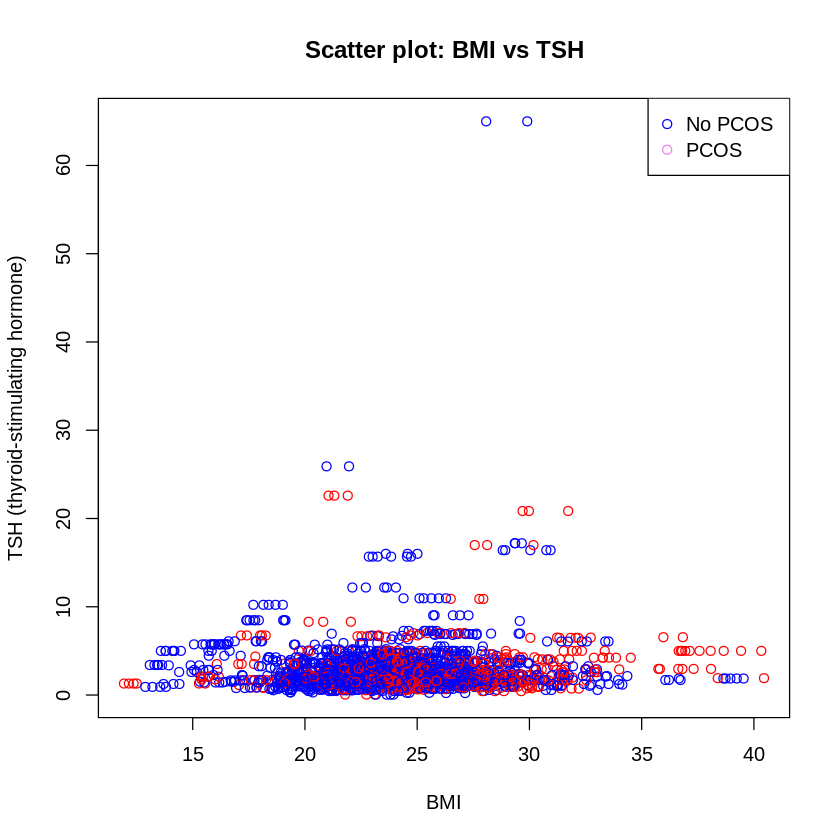

In [ ]:
# Scatter plot: BMI vs TSH, colored by PCOS status
plot(numeric_data$BMI, numeric_data$TSH..mIU.L., col = colors,
     xlab = "BMI", ylab = "TSH (thyroid-stimulating hormone)",
     main = "Scatter plot: BMI vs TSH")

# Add legend
legend("topright", legend = c("No PCOS", "PCOS"), col = c("blue", "violet"), pch = 1)


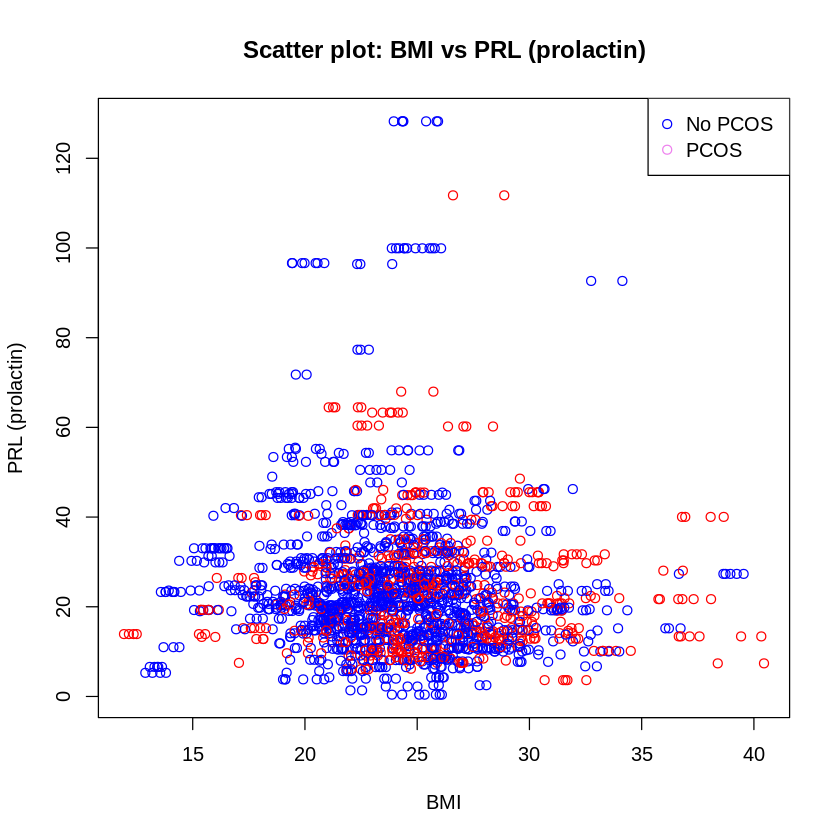

In [ ]:
# Scatter plot: BMI vs PRL (prolactin), colored by PCOS status
plot(numeric_data$BMI, numeric_data$PRL.ng.mL., col = colors,
     xlab = "BMI", ylab = "PRL (prolactin)",
     main = "Scatter plot: BMI vs PRL (prolactin)")

# Add legend
legend("topright", legend = c("No PCOS", "PCOS"), col = c("blue", "violet"), pch = 1)


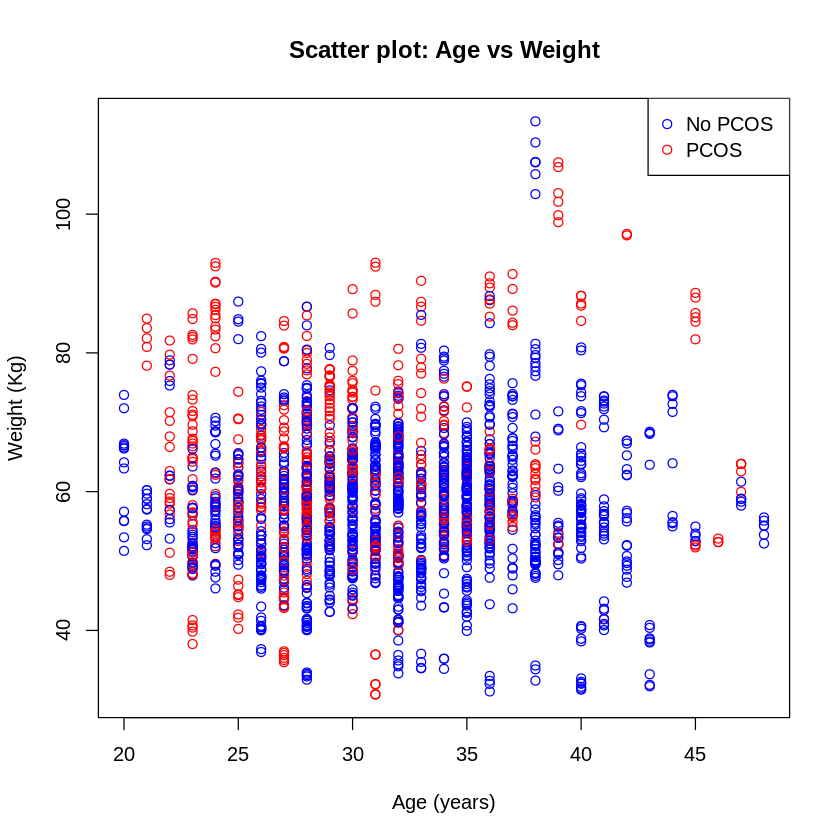

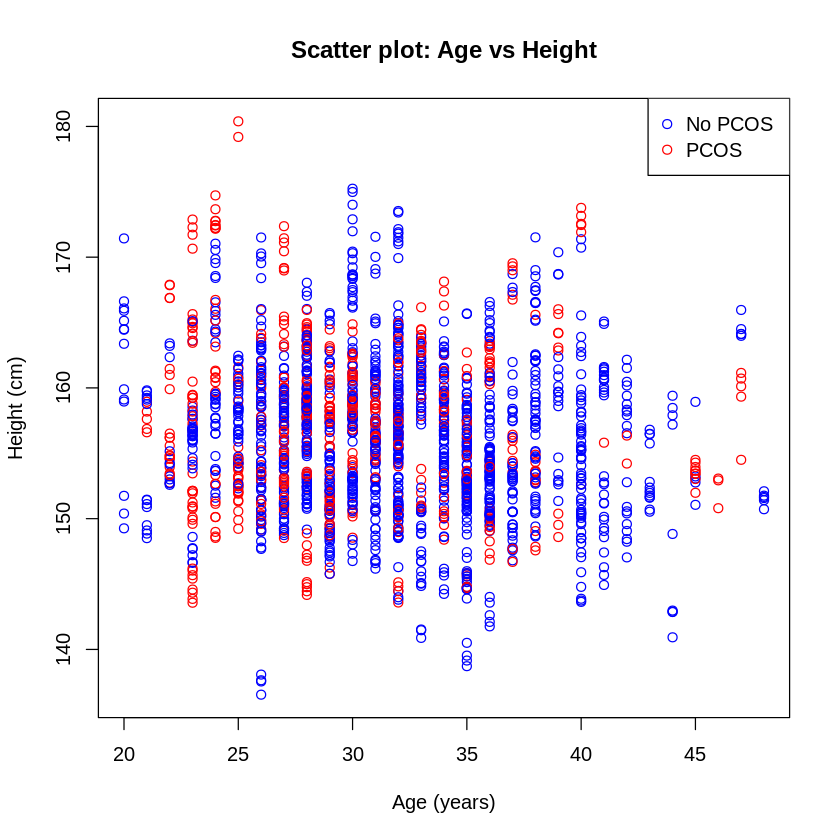

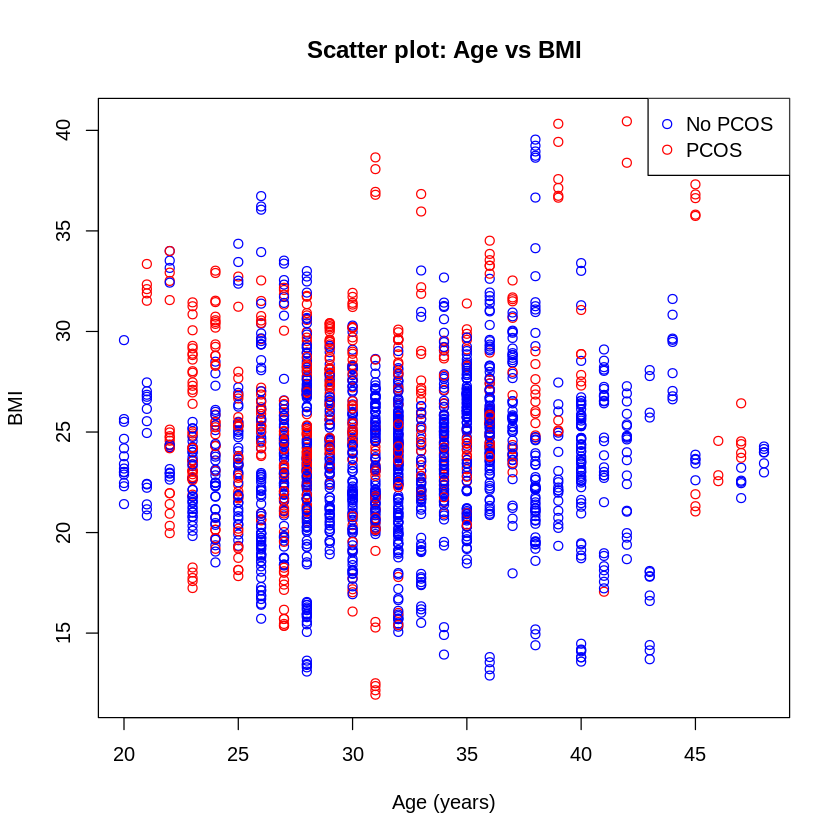

In [ ]:
# Scatter plot: Age vs Weight, colored by PCOS status
plot(numeric_data$Age..yrs., numeric_data$Weight..Kg., col = colors,
     xlab = "Age (years)", ylab = "Weight (Kg)",
     main = "Scatter plot: Age vs Weight")

# Add legend
legend("topright", legend = c("No PCOS", "PCOS"), col = c("blue", "red"), pch = 1)

# Scatter plot: Age vs Height, colored by PCOS status
plot(numeric_data$Age..yrs., numeric_data$Height.Cm., col = colors,
     xlab = "Age (years)", ylab = "Height (cm)",
     main = "Scatter plot: Age vs Height")

# Add legend
legend("topright", legend = c("No PCOS", "PCOS"), col = c("blue", "red"), pch = 1)

# Scatter plot: Age vs BMI, colored by PCOS status
plot(numeric_data$Age..yrs., numeric_data$BMI, col = colors,
     xlab = "Age (years)", ylab = "BMI",
     main = "Scatter plot: Age vs BMI")

# Add legend
legend("topright", legend = c("No PCOS", "PCOS"), col = c("blue", "red"), pch = 1)

# Repeat this process for other pairs of variables...


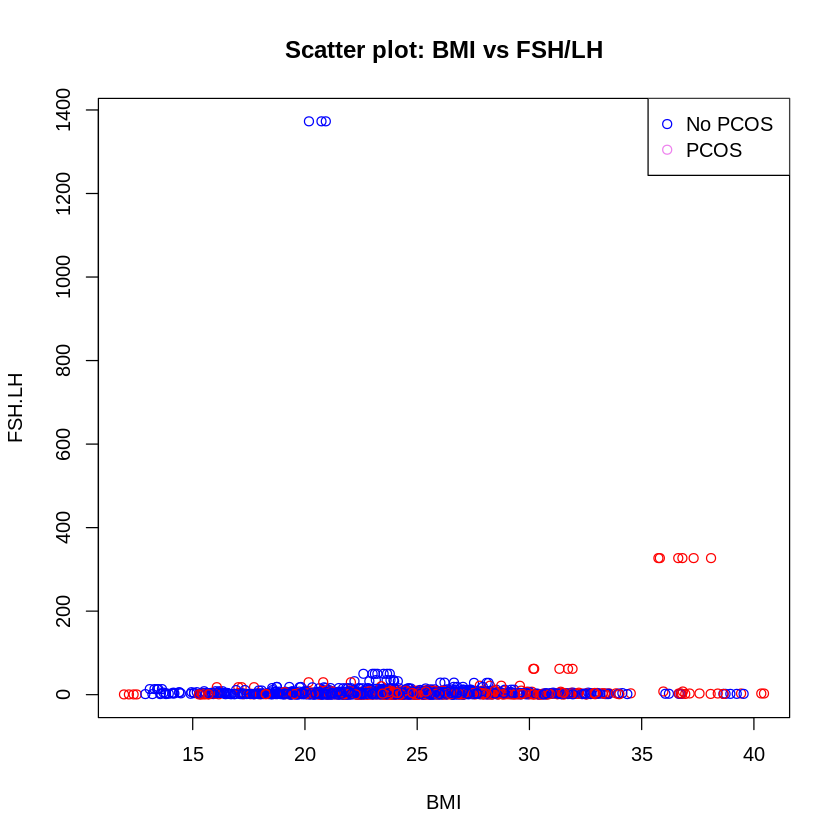

In [ ]:
# Scatter plot: BMI vs FSH/LH  , colored by PCOS status
plot(numeric_data$BMI, numeric_data$FSH.LH  , col = colors,
     xlab = "BMI", ylab = "FSH.LH",
     main = "Scatter plot: BMI vs FSH/LH")

# Add legend
legend("topright", legend = c("No PCOS", "PCOS"), col = c("blue", "violet"), pch = 1)

In [ ]:
# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values)

                Sl. No       Patient File No.             PCOS (Y/N) 
                     0                      0                      0 
             Age (yrs)            Weight (Kg)             Height(Cm) 
                     0                      0                      0 
                   BMI            Blood Group        Pulse rate(bpm) 
                     0                      0                      0 
      RR (breaths/min)               Hb(g/dl)             Cycle(R/I) 
                     0                      0                      0 
    Cycle length(days)  Marraige Status (Yrs)          Pregnant(Y/N) 
                     0                      3                      0 
      No. of abortions   I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL) 
                     0                      0                      0 
           FSH(mIU/mL)             LH(mIU/mL)                 FSH/LH 
                     0                      0                      0 
             Hip(inc